In [1]:
import pandas as pd

data = pd.read_parquet('data/train.parquet')
print(data)

        seq_ix  step_in_seq  need_prediction         0         1         2  \
0            0            0                0 -0.080082  1.324564  0.637730   
1            0            1                0 -1.243274  0.398425 -1.810485   
2            0            2                0 -0.124680  1.225580  0.139482   
3            0            3                0 -1.264455  0.494485 -1.041663   
4            0            4                0 -0.882663 -0.223168 -1.229349   
...        ...          ...              ...       ...       ...       ...   
516995     516          995                1 -0.637696 -0.938058 -0.717372   
516996     516          996                1 -0.742073 -0.872802 -0.913195   
516997     516          997                1 -0.627282 -0.947610 -0.704207   
516998     516          998                1 -0.781694 -0.876804 -1.356198   
516999     516          999                0 -0.889236 -0.739815 -1.456582   

               3         4         5         6  ...        22  

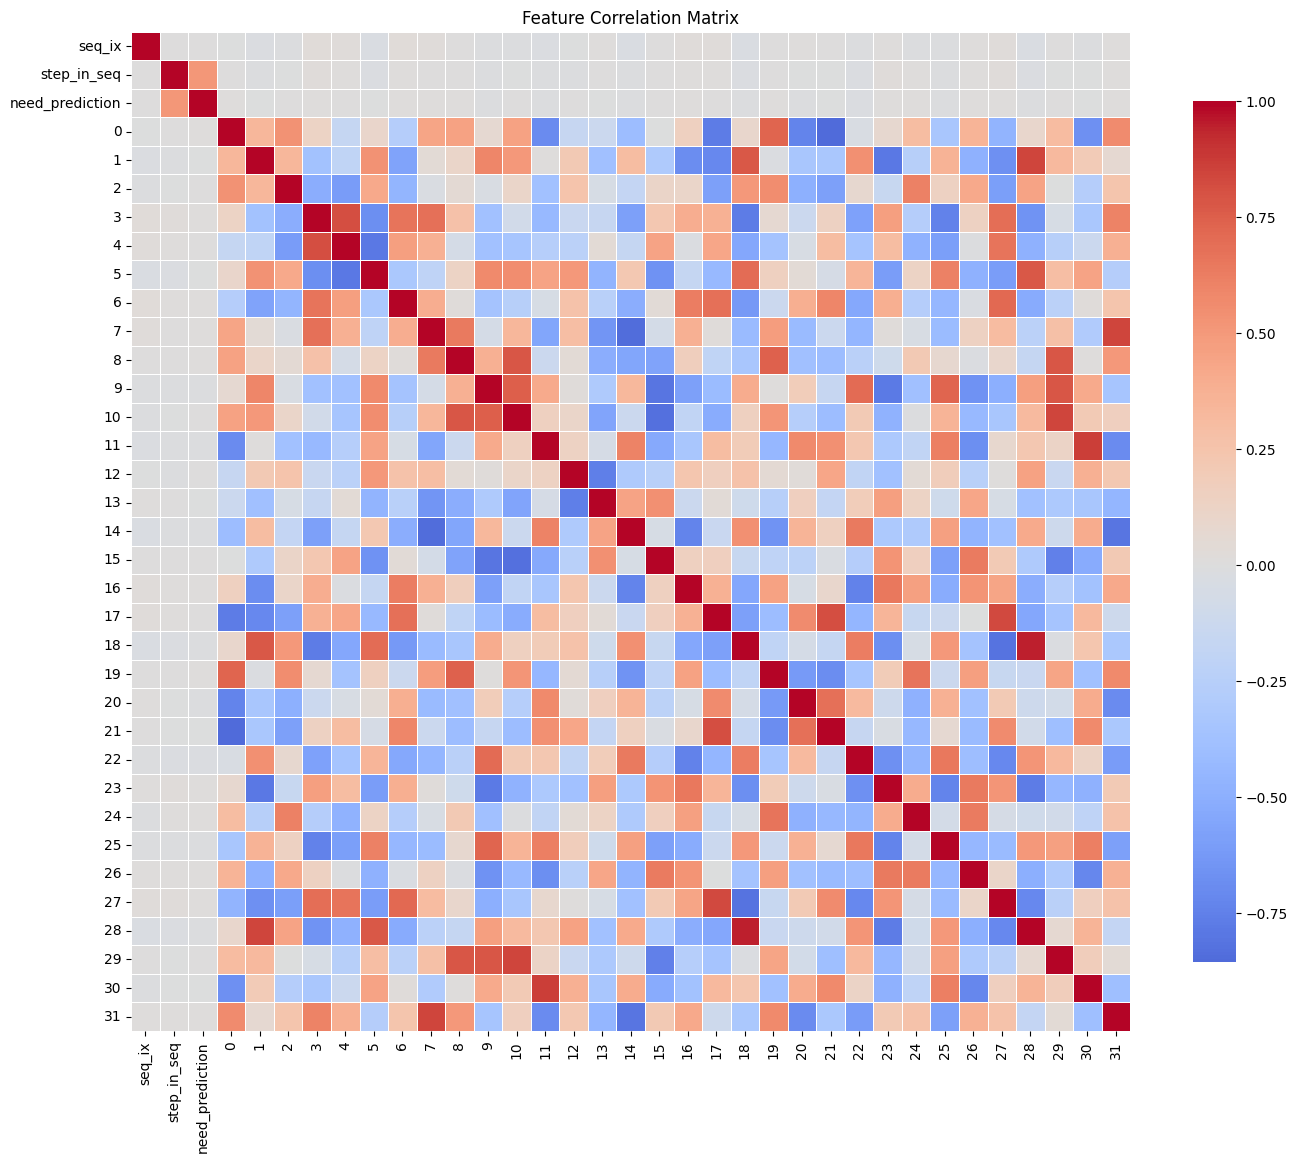

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [5]:
# Check for missing values
missing_summary = pd.DataFrame({
    'Column': data.columns,
    'Missing_Count': data.isnull().sum(),
    'Missing_Percentage': 100 * data.isnull().sum() / len(data)
})
print(missing_summary[missing_summary['Missing_Count'] > 0])

# Identify rows without complete windows due to missing data
windows_with_missing = []
for i in range(100, len(data)):
    window = data.iloc[i-100:i]
    if window.isnull().any().any():
        windows_with_missing.append(i)

print(f"Windows with missing values: {len(windows_with_missing)}")

Empty DataFrame
Columns: [Column, Missing_Count, Missing_Percentage]
Index: []
Windows with missing values: 0


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Get unique sequences
unique_seqs = data['seq_ix'].unique()
n_seqs = len(unique_seqs)

# Use a colormap that handles many sequences
cmap = plt.cm.get_cmap('hsv')
norm = Normalize(vmin=0, vmax=n_seqs-1)
colors = [cmap(norm(i)) for i in range(n_seqs)]

# Create 32 subplots
fig, axes = plt.subplots(8, 4, figsize=(20, 24))
axes = axes.flatten()

# Plot each feature
for feature_idx in range(32):
    ax = axes[feature_idx]
    
    # Plot each sequence with a different color
    for seq_idx, seq_id in enumerate(unique_seqs):
        seq_data = data[data['seq_ix'] == seq_id].sort_values('step_in_seq')
        ax.plot(seq_data['step_in_seq'], seq_data[str(feature_idx)], 
                color=colors[seq_idx], alpha=0.6, linewidth=1.2, label=f'Seq {seq_idx}')
    
    ax.set_title(f'Feature {feature_idx}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Step in Sequence')
    ax.set_ylabel('Value')
    ax.grid(True, alpha=0.3)

# Add a single legend for the first subplot (showing sequence colors)
handles, labels = axes[0].get_legend_handles_labels()
if len(handles) > 0:
    fig.legend(handles[:min(10, len(handles))], labels[:min(10, len(handles))], 
               loc='upper center', ncol=5, fontsize=8, bbox_to_anchor=(0.5, 1.00))

plt.tight_layout()
plt.savefig('feature_sequences.png', dpi=150, bbox_inches='tight')
plt.show()

/var/folders/mq/ytl_51gj3bxcbw6g42cllw300000gn/T/ipykernel_83015/1328273994.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('hsv')
100%|██████████| 32/32 [00:08<00:00,  3.78it/s]


KeyboardInterrupt: 